[*********************100%***********************]  5 of 5 completed

=== ข้อมูลล่าสุดของหุ้น 5 ตัว ===
Ticker             AEP         DUK          ED        EXC         SO
Date                                                                
2025-10-06  115.660004  124.379997   99.330002  45.689999  95.489998
2025-10-07  118.160004  125.559998  100.040001  46.790001  96.419998
2025-10-08  118.190002  125.230003  100.830002  46.619999  96.180000
2025-10-09  116.910004  124.709999  100.800003  46.660000  96.129997
2025-10-10  117.040001  127.019997  102.389999  47.070000  98.290001

=== ขนาดข้อมูล ===
(1256, 5)

=== สรุปข้อมูลสถิติ (Price) ===
Ticker          AEP          DUK           ED          EXC           SO
count   1256.000000  1256.000000  1256.000000  1256.000000  1256.000000
mean      83.636848    93.904244    83.179266    35.805122    67.469515
std       11.765773    13.080033    12.879881     5.477848    13.072267
min       63.398182    71.707947    55.941067    23.265764    47.457851
25%       74.267397    84.842207    73.382769    33.087021  

<Figure size 14000x6000 with 0 Axes>

c:\Users\HP\AppData\Local\Programs\Python\Python311\Lib\site-packages\IPython\core\pylabtools.py:170: UserWarning: Glyph 128200 (\N{CHART WITH UPWARDS TREND}) missing from font(s) DejaVu Sans.
  fig.canvas.print_figure(bytes_io, **kw)


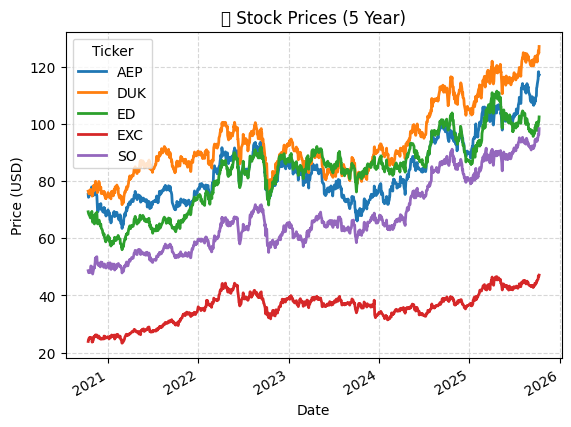

<Figure size 1400x600 with 0 Axes>

c:\Users\HP\AppData\Local\Programs\Python\Python311\Lib\site-packages\IPython\core\pylabtools.py:170: UserWarning: Glyph 128202 (\N{BAR CHART}) missing from font(s) DejaVu Sans.
  fig.canvas.print_figure(bytes_io, **kw)


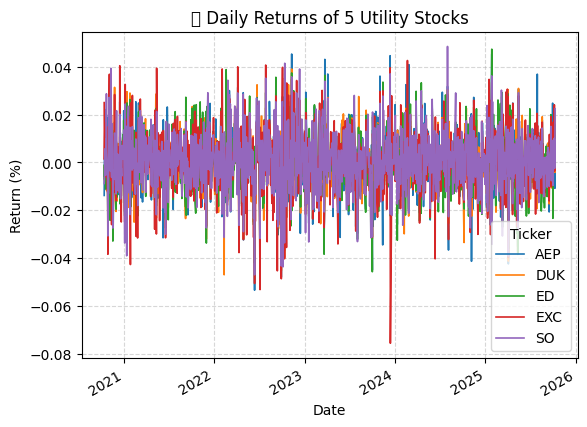


=== Correlation Matrix ===
Ticker       AEP       DUK        ED       EXC        SO
Ticker                                                  
AEP     1.000000  0.807947  0.771967  0.729151  0.791481
DUK     0.807947  1.000000  0.829426  0.726982  0.820244
ED      0.771967  0.829426  1.000000  0.703092  0.791853
EXC     0.729151  0.726982  0.703092  1.000000  0.720167
SO      0.791481  0.820244  0.791853  0.720167  1.000000


c:\Users\HP\AppData\Local\Programs\Python\Python311\Lib\site-packages\IPython\core\pylabtools.py:170: UserWarning: Glyph 128293 (\N{FIRE}) missing from font(s) DejaVu Sans.
  fig.canvas.print_figure(bytes_io, **kw)


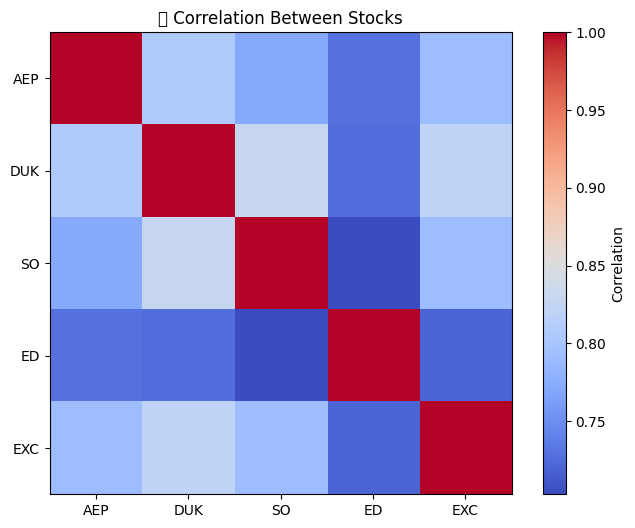


=== สรุปผลรวม ===


,Mean Price (USD),Volatility (std),Avg Daily Return (%)
Ticker,,,
AEP,83.64,1.3,0.043
DUK,93.90,1.1,0.047
ED,83.18,1.2,0.038
EXC,35.81,1.3,0.063
SO,67.47,1.2,0.063


In [15]:
import yfinance as yf
import pandas as pd
import matplotlib.pyplot as plt

# 1️⃣ โหลดข้อมูลราคาหุ้นย้อนหลัง 5 ปี
TICKERS = ["AEP", "DUK", "SO", "ED", "EXC"]
data = yf.download(TICKERS, period="5y", auto_adjust=True)["Close"]

print("=== ข้อมูลล่าสุดของหุ้น 5 ตัว ===")
print(data.tail())

# 2️⃣ สถิติพื้นฐาน
print("\n=== ขนาดข้อมูล ===")
print(data.shape)

print("\n=== สรุปข้อมูลสถิติ (Price) ===")
print(data.describe())

# 3️⃣ ผลตอบแทนรายวัน (Daily Returns)
returns = data.pct_change().dropna()
print("\n=== ผลตอบแทนรายวัน (Returns) ===")
print(returns.describe())

# 4️⃣ กราฟราคา (แบบกว้าง)
plt.figure(figsize=(140,60))
data.plot(title="📈 Stock Prices (5 Year)", linewidth=2)
plt.ylabel("Price (USD)")
plt.xlabel("Date")
plt.grid(True, linestyle="--", alpha=0.5)
plt.show()

# 5️⃣ กราฟผลตอบแทนรายวัน (แบบกว้าง)
plt.figure(figsize=(14,6))
returns.plot(title="📊 Daily Returns of 5 Utility Stocks", linewidth=1.2)
plt.ylabel("Return (%)")
plt.xlabel("Date")
plt.grid(True, linestyle="--", alpha=0.5)
plt.show()

# 6️⃣ Heatmap ความสัมพันธ์ระหว่างหุ้น
corr = returns.corr()
print("\n=== Correlation Matrix ===")
print(corr)

plt.figure(figsize=(8,6))
plt.imshow(corr, cmap='coolwarm', interpolation='nearest')
plt.title("🔥 Correlation Between Stocks")
plt.xticks(range(len(TICKERS)), TICKERS, rotation=0)
plt.yticks(range(len(TICKERS)), TICKERS)
plt.colorbar(label="Correlation")
plt.show()

# 7️⃣ สรุปสั้น ๆ
summary = pd.DataFrame({
    "Mean Price (USD)": data.mean().round(2),
    "Volatility (std)": returns.std().round(3)*100,
    "Avg Daily Return (%)": (returns.mean()*100).round(3)
})
print("\n=== สรุปผลรวม ===")
summary


In [16]:
print("\n=== Missing Value Count (After FFill) ===")
print(data.isna().sum())


=== Missing Value Count (After FFill) ===
Ticker
AEP    0
DUK    0
ED     0
EXC    0
SO     0
dtype: int64


In [17]:
summary

,Mean Price (USD),Volatility (std),Avg Daily Return (%)
Ticker,,,
AEP,83.64,1.3,0.043
DUK,93.90,1.1,0.047
ED,83.18,1.2,0.038
EXC,35.81,1.3,0.063
SO,67.47,1.2,0.063


[*********************100%***********************]  5 of 5 completed


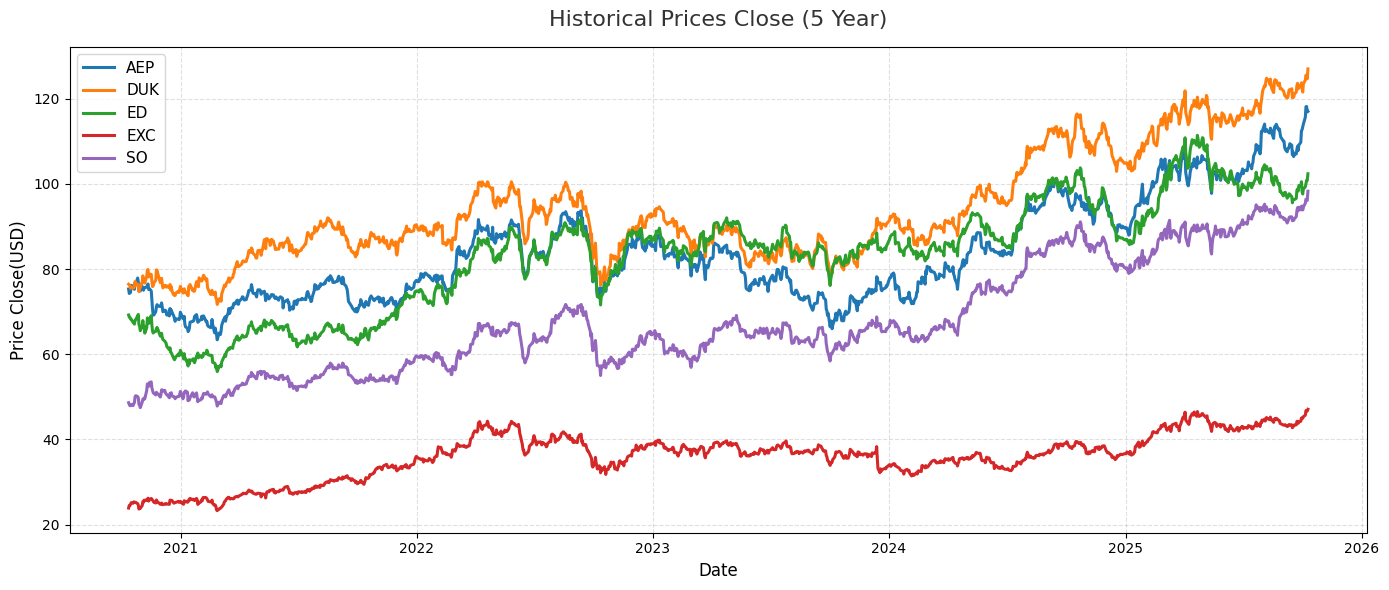

In [26]:
import yfinance as yf
import pandas as pd
import matplotlib.pyplot as plt

# ---------- 1. โหลดข้อมูล ----------
TICKERS = ["AEP", "DUK", "SO", "ED", "EXC"]
data = yf.download(TICKERS, period="5y", auto_adjust=True)["Close"]

# ---------- 2. ตั้งค่ากราฟ ----------
plt.style.use("default")  # โทนสว่าง
plt.figure(figsize=(14,6))  # กว้างเหมือนใน slide

# พาเลตต์สีดูสะอาด เรียบหรู
colors = ["#1f77b4", "#ff7f0e", "#2ca02c", "#d62728", "#9467bd"]

# ---------- 3. วาดกราฟ ----------
for i, col in enumerate(data.columns):
    plt.plot(data.index, data[col],
             label=col,
             linewidth=2.2,
             color=colors[i])

# ---------- 4. ตกแต่ง ----------
plt.title("Historical Prices Close (5 Year)", fontsize=16, color="#333", pad=15)
plt.xlabel("Date", fontsize=12)
plt.ylabel("Price Close(USD)", fontsize=12)
plt.grid(True, linestyle="--", alpha=0.4)
plt.legend(frameon=True, facecolor="white", edgecolor="#ccc", fontsize=11)
plt.tight_layout()
plt.show()


[*********************100%***********************]  5 of 5 completed


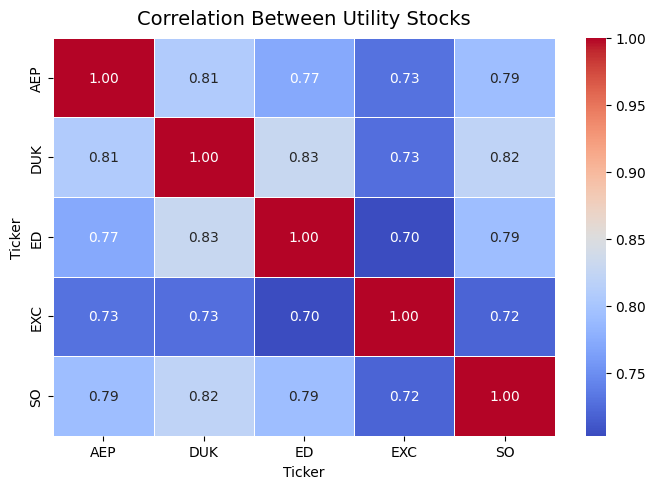

In [19]:
import yfinance as yf
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# โหลดข้อมูลย้อนหลัง 1 ปี
TICKERS = ["AEP", "DUK", "SO", "ED", "EXC"]
data = yf.download(TICKERS, period="5y", auto_adjust=True)["Close"]

# คำนวณผลตอบแทนรายวัน
returns = data.pct_change().dropna()

# สร้าง Heatmap ความสัมพันธ์
corr = returns.corr()

plt.figure(figsize=(7,5))
sns.heatmap(corr, annot=True, cmap="coolwarm", fmt=".2f", linewidths=0.5)
plt.title("Correlation Between Utility Stocks", fontsize=14, pad=10)
plt.tight_layout()
plt.show()


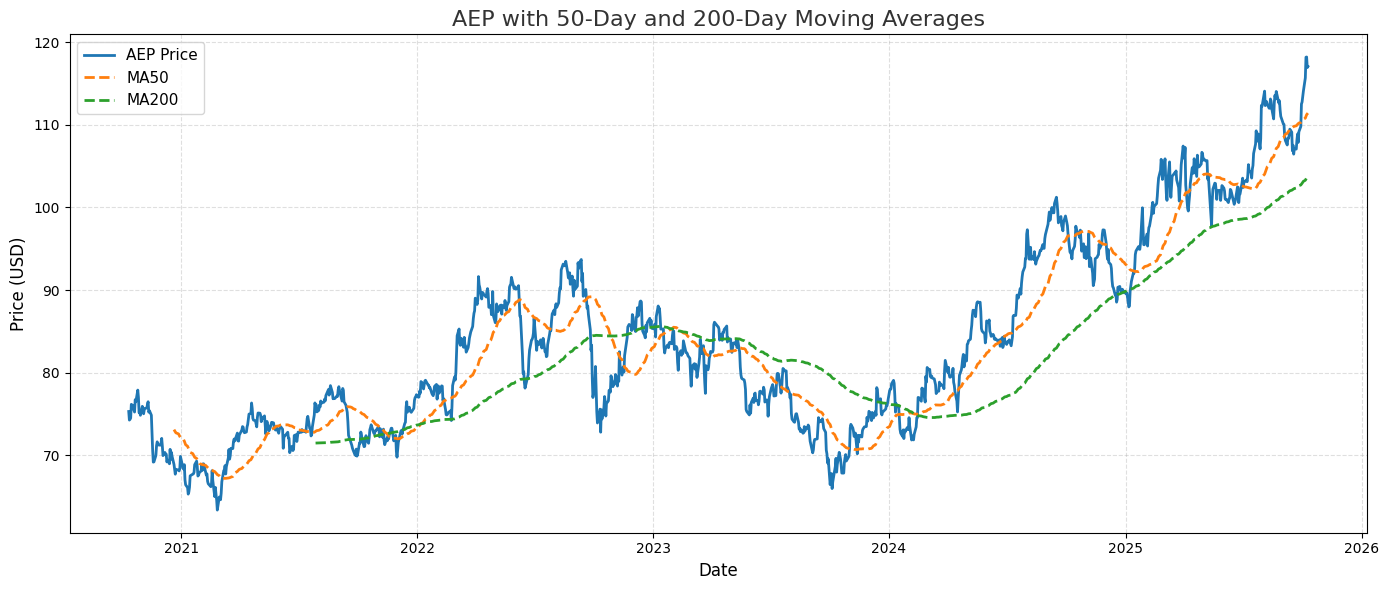

In [20]:
plt.figure(figsize=(14,6))

# คำนวณค่าเฉลี่ยเคลื่อนที่ 50 วัน และ 200 วัน
ma50 = data.rolling(window=50).mean()
ma200 = data.rolling(window=200).mean()

# เลือกหุ้นตัวอย่าง (หรือจะ loop ทุกตัวก็ได้)
symbol = "AEP"

plt.plot(data.index, data[symbol], label=f"{symbol} Price", color="#1f77b4", linewidth=2)
plt.plot(ma50.index, ma50[symbol], label="MA50", color="#ff7f0e", linestyle="--", linewidth=2)
plt.plot(ma200.index, ma200[symbol], label="MA200", color="#2ca02c", linestyle="--", linewidth=2)

plt.title(f"{symbol} with 50-Day and 200-Day Moving Averages", fontsize=16, color="#333")
plt.xlabel("Date", fontsize=12)
plt.ylabel("Price (USD)", fontsize=12)
plt.legend(frameon=True, facecolor="white", edgecolor="#ccc", fontsize=11)
plt.grid(True, linestyle="--", alpha=0.4)
plt.tight_layout()
plt.show()


[*********************100%***********************]  1 of 1 completed


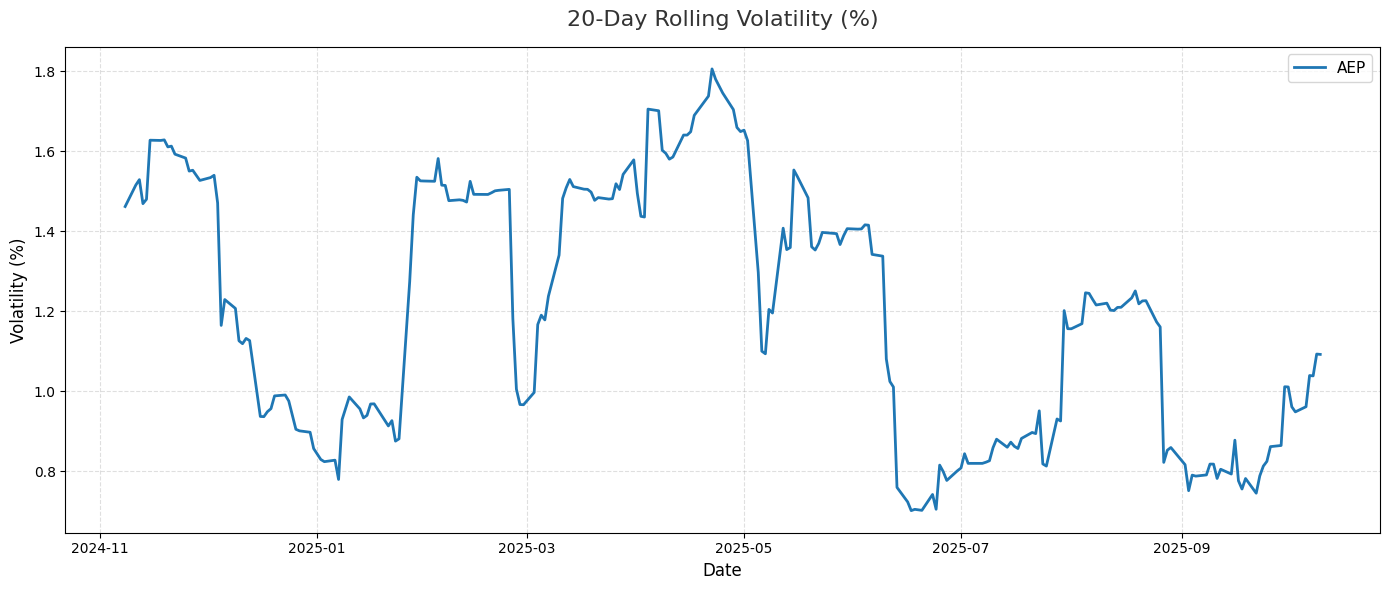

In [21]:
import yfinance as yf
import pandas as pd
import matplotlib.pyplot as plt

# ---------- โหลดข้อมูล ----------
TICKERS = ["AEP"]
data = yf.download(TICKERS, period="1y", auto_adjust=True)["Close"]

# ---------- คำนวณผลตอบแทนและความผันผวน ----------
returns = data.pct_change().dropna()
volatility = returns.rolling(window=20).std() * 100  # คูณ 100 เป็น %

# ---------- วาดกราฟ ----------
plt.style.use("default")
plt.figure(figsize=(14,6))

colors = ["#1f77b4", "#ff7f0e", "#2ca02c", "#d62728", "#9467bd"]

for i, col in enumerate(volatility.columns):
    plt.plot(volatility.index, volatility[col],
             color=colors[i], linewidth=2, label=col)

plt.title("20-Day Rolling Volatility (%)", fontsize=16, color="#333", pad=15)
plt.xlabel("Date", fontsize=12)
plt.ylabel("Volatility (%)", fontsize=12)
plt.grid(True, linestyle="--", alpha=0.4)
plt.legend(frameon=True, facecolor="white", edgecolor="#ccc", fontsize=11)
plt.tight_layout()
plt.show()


In [22]:
import yfinance as yf
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

TICKERS = ["AEP", "DUK", "SO", "ED", "EXC"]
data = yf.download(TICKERS, period="5y", auto_adjust=True)["Close"]

# ✅ ตรวจหาค่าหาย
print("จำนวน Missing Values ในแต่ละหุ้น:")
print(data.isna().sum())

# ✅ ตรวจสัดส่วนที่หาย (เป็น %)
print("\nเปอร์เซ็นต์ข้อมูลที่หาย:")
print((data.isna().mean() * 100).round(2))


[*********************100%***********************]  5 of 5 completed

จำนวน Missing Values ในแต่ละหุ้น:
Ticker
AEP    0
DUK    0
ED     0
EXC    0
SO     0
dtype: int64

เปอร์เซ็นต์ข้อมูลที่หาย:
Ticker
AEP    0.0
DUK    0.0
ED     0.0
EXC    0.0
SO     0.0
dtype: float64


In [23]:
# ✅ เติมค่าเดิมก่อนหน้า (Forward Fill)
data_filled = data.ffill()

# ✅ ตรวจซ้ำว่าไม่มีค่าว่างแล้ว
print("Missing values หลังเติม:", data_filled.isna().sum().sum())


Missing values หลังเติม: 0



จำนวน Outliers ในแต่ละหุ้น:
Ticker
AEP    11
DUK     8
ED     10
EXC    13
SO     11
dtype: int64


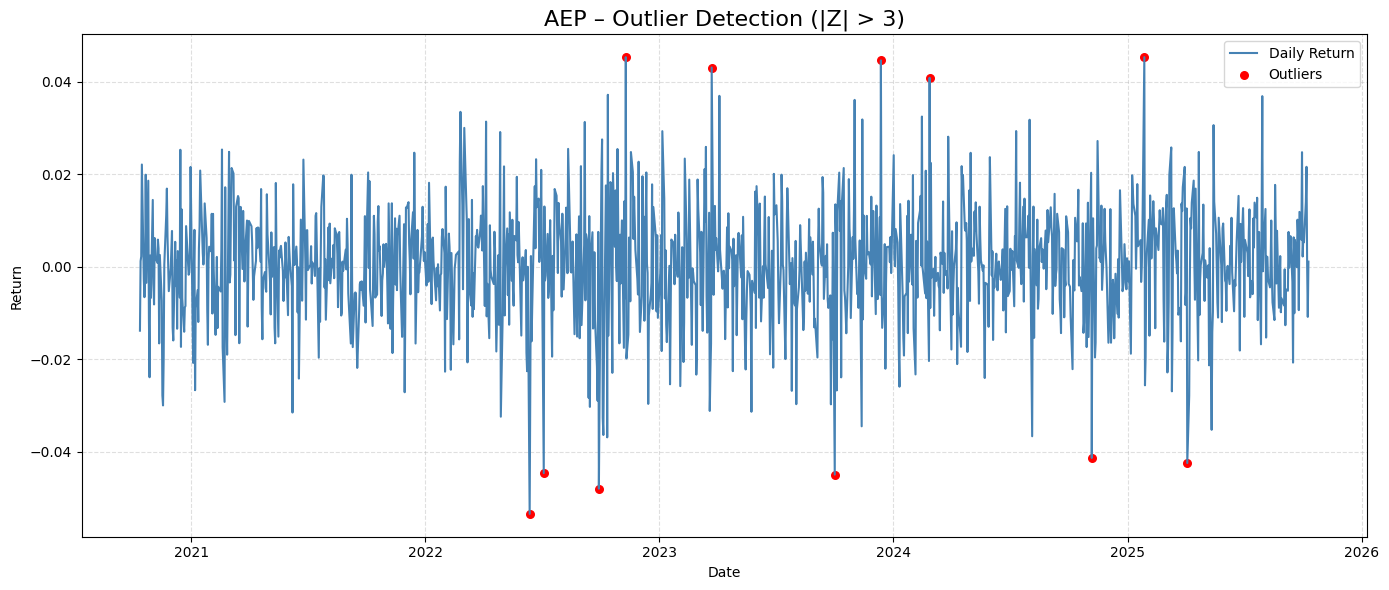

In [24]:
# ✅ คำนวณผลตอบแทนรายวัน
returns = data_filled.pct_change().dropna()

# ✅ ใช้วิธี Z-score เพื่อตรวจหาค่าผิดปกติ
zscore = (returns - returns.mean()) / returns.std()
outliers = (abs(zscore) > 3)   # ถ้ามากกว่า 3 std ถือว่าเป็น outlier

print("\nจำนวน Outliers ในแต่ละหุ้น:")
print(outliers.sum())

# ✅ กราฟแสดงจุดผิดปกติ (ตัวอย่าง AEP)
symbol = "AEP"
plt.figure(figsize=(14,6))
plt.plot(returns.index, returns[symbol], label="Daily Return", color="steelblue")
plt.scatter(returns.index[outliers[symbol]], returns[symbol][outliers[symbol]], 
            color="red", label="Outliers", s=30)
plt.title(f"{symbol} – Outlier Detection (|Z| > 3)", fontsize=16)
plt.xlabel("Date")
plt.ylabel("Return")
plt.legend()
plt.grid(True, linestyle="--", alpha=0.4)
plt.tight_layout()
plt.show()


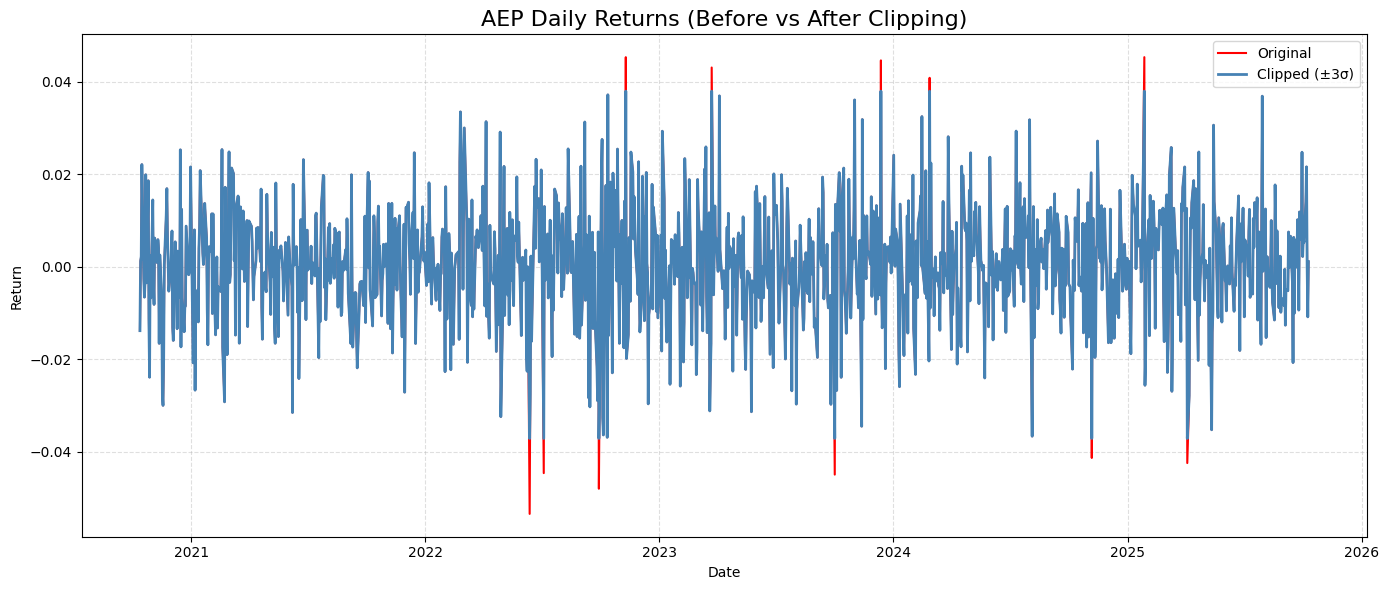

In [25]:
returns_clipped = returns.clip(
    lower=(returns.mean() - 3 * returns.std()),
    upper=(returns.mean() + 3 * returns.std()),
    axis=1
)

symbol = "AEP"

plt.figure(figsize=(14,6))
plt.plot(returns.index, returns[symbol], label="Original", color="red", alpha=1)
plt.plot(returns_clipped.index, returns_clipped[symbol], label="Clipped (±3σ)", color="steelblue", linewidth=2)
plt.title(f"{symbol} Daily Returns (Before vs After Clipping)", fontsize=16)
plt.xlabel("Date")
plt.ylabel("Return")
plt.grid(True, linestyle="--", alpha=0.4)
plt.legend()
plt.tight_layout()
plt.show()
